In [214]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier


# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')



In [196]:
import os
print(os.listdir("./data/data_sci"))

['test.csv', 'train.csv', 'trainLabels.csv']


In [197]:
# 讀取檔案
a_train = pd.read_csv('./data/data_sci/train.csv',header=None)
a_test = pd.read_csv('./data/data_sci/test.csv',header=None)
a_target = pd.read_csv('./data/data_sci/trainLabels.csv',header=None)

In [198]:
a_train.shape

(1000, 40)

In [199]:
a_test.shape

(9000, 40)

In [188]:
a_target.shape

(1000, 1)

In [201]:
a_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [202]:
a_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [203]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(a_train, a_target, test_size=0.3, random_state=4)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 40), (300, 40), (700, 1), (300, 1))

In [204]:
# 建立模型 DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = None,min_samples_split = 2,min_samples_leaf =10)             
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.7933333333333333
Feature importance:  [0.         0.         0.01072387 0.         0.         0.0074986
 0.13255669 0.01980524 0.         0.         0.         0.00926171
 0.1184196  0.         0.21486475 0.01708197 0.         0.
 0.11141443 0.         0.         0.         0.         0.
 0.         0.01737335 0.         0.         0.03173316 0.12740097
 0.         0.         0.04648098 0.         0.03677717 0.
 0.07430113 0.         0.02034506 0.00396133]


In [205]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, max_depth=20)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.86
Feature importance:  [0.01402731 0.01654754 0.01536996 0.01398992 0.03984503 0.01248227
 0.06338108 0.01953265 0.01426017 0.01228636 0.01761161 0.0090383
 0.081797   0.01170556 0.10107749 0.01832655 0.00912325 0.00892149
 0.07158697 0.00809063 0.01030261 0.01288843 0.01829902 0.02841779
 0.01164737 0.01510744 0.00979062 0.00935182 0.03393859 0.03320875
 0.01823939 0.01490976 0.03930165 0.01859571 0.03045627 0.00600387
 0.05504321 0.01023139 0.01704159 0.04822357]


In [210]:
from sklearn.ensemble import GradientBoostingClassifier

gclf = GradientBoostingClassifier()
gclf.fit(x_train, y_train)
y_pred = gclf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature importance: ", gclf.feature_importances_)

Acuuracy:  0.8933333333333333
Feature importance:  [0.01173878 0.01459518 0.02817097 0.03165745 0.03204119 0.00557683
 0.05389718 0.0494826  0.00663426 0.00078674 0.0118363  0.00181148
 0.05077029 0.00765631 0.10598651 0.02110307 0.00198227 0.01378657
 0.04396891 0.00438011 0.01779162 0.01364609 0.01891447 0.01902982
 0.01889794 0.02978536 0.00405945 0.002985   0.02881746 0.07710746
 0.01594917 0.01140521 0.04117453 0.01008066 0.04213067 0.00079907
 0.07242172 0.00231447 0.01751745 0.05730939]


In [211]:
pred  = gclf.predict(a_test)
best_pred = pd.DataFrame(pred)

best_pred.index += 1

best_pred.columns = ['Solution']
best_pred['Id'] = np.arange(1,best_pred.shape[0]+1)
best_pred = best_pred[['Id', 'Solution']]
best_pred.head()


,Id,Solution
1,1,1
2,2,0
3,3,0
4,4,0
5,5,0


In [212]:
best_pred.to_csv('submission_48.csv',index=False)

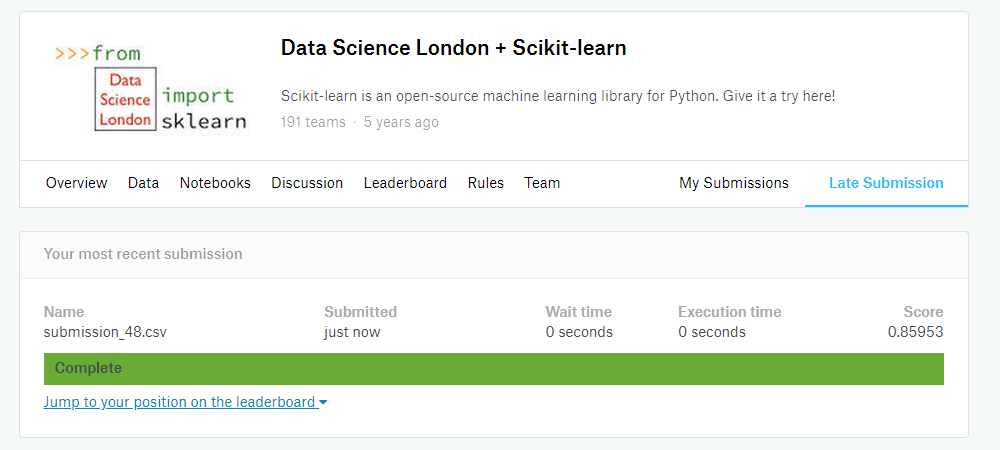

In [218]:
from IPython.display import Image
Image(filename='submission_48.png') 